# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


O dataframe contém 303 entradas e 15 colunas, incluindo variáveis numéricas e categóricas. Das colunas, 11 são do tipo `float64` (representando variáveis contínuas, como `age`, `trestbps`, `chol`, etc.), 2 são do tipo `int64` (incluindo a variável alvo `flag_doente` e `num`), e 2 são do tipo `object` (`ca` e `thal`), que provavelmente contêm valores categóricos. Para facilitar a análise e o uso em modelos estatísticos, essas variáveis `object` podem ser transformadas em variáveis dummy. O uso de memória do dataframe é de aproximadamente 35.6 KB.


In [7]:
import numpy as np

# Substituir '?' por NaN
df['ca'] = df['ca'].replace('?', np.nan).astype(float)
df['thal'] = df['thal'].replace('?', np.nan).astype(float)

# Verificar novamente os tipos de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           299 non-null    float64
 12  thal         301 non-null    float64
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 35.6 KB


O código acima realiza o pré-processamento dos dados nas colunas `ca` e `thal` do dataframe. Primeiro, substitui qualquer valor `'?'` nessas colunas por `NaN` (representando valores ausentes) usando o método `.replace()`. Em seguida, converte as colunas para o tipo `float` com `.astype(float)`. Depois, `df.info()` é executado novamente para verificar os tipos de dados e a quantidade de valores não nulos em cada coluna.

Como resultado, o `df.info()` mostra que as colunas `ca` e `thal` agora estão corretamente no tipo `float64`. Observa-se também que a coluna `ca` possui 299 valores não nulos (ou seja, 4 valores ausentes), enquanto `thal` continua com todos os valores preenchidos.



In [8]:
# Checar valores ausentes
print(df.isnull().sum())


age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             4
thal           2
num            0
flag_doente    0
dtype: int64


Os resultados da verificação de valores ausentes mostram que as colunas ca e thal possuem dados ausentes, com 4 e 2 valores ausentes, respectivamente. Todas as outras colunas estão completamente preenchidas, sem valores nulos. Essa informação é importante para decidir como tratar os valores ausentes nessas duas colunas, seja por meio de exclusão de linhas, preenchimento com média/moda, ou uso de outras técnicas de imputação, dependendo do impacto desses valores no modelo.

In [11]:
# Imputar valores ausentes com a mediana
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

# Verificar novamente se há valores ausentes
print("Valores ausentes após imputação:")
print(df.isnull().sum())


Valores ausentes após imputação:
age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64


Após a etapa de imputação, não há valores ausentes em nenhuma das colunas do dataframe. Todas as variáveis, incluindo `ca` e `thal`, que anteriormente poderiam ter valores ausentes, foram completamente preenchidas. Isso assegura que o dataframe está pronto para análises e para a construção de modelos, sem a necessidade de lidar com dados ausentes, o que melhora a robustez e a precisão das análises subsequentes.


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [24]:
def bivariate_analysis(df, response_var, explanatory_var):
    """
    Realiza uma análise bivariada entre a variável resposta e a variável explicativa.
    
    Parâmetros:
        df (DataFrame): O dataframe contendo os dados a serem avaliados.
        response_var (str): O nome da coluna que representa a variável resposta (alvo).
        explanatory_var (str): O nome da coluna que representa a variável explicativa.
        
    Retorno:
        DataFrame: Um dataframe contendo a tabela bivariada (contagem e proporções).
    """
    # Calcula a contagem bivariada
    bivariate_counts = pd.crosstab(df[explanatory_var], df[response_var])
    
    # Calcula as proporções para cada valor da variável explicativa
    bivariate_proportions = bivariate_counts.div(bivariate_counts.sum(axis=1), axis=0)
    
    # Combina as contagens e proporções em um único dataframe
    bivariate_df = bivariate_counts.join(bivariate_proportions, rsuffix='_proportion')
    
    return bivariate_df

# Exemplo de uso com três variáveis qualitativas para verificar qual delas discrimina mais o risco

# Variável resposta
response_var = 'flag_doente'

# Escolhendo três variáveis qualitativas do dataframe para análise
qualitative_vars = ['sex', 'cp', 'fbs']  # Supondo que essas são variáveis qualitativas no seu dataset

# Análise bivariada para cada variável qualitativa
for var in qualitative_vars:
    print(f"Análise Bivariada para {var}:")
    bivariate_df = bivariate_analysis(df, response_var, var)
    print(bivariate_df)
    print("\n")


Análise Bivariada para sex:
flag_doente   0    1  0_proportion  1_proportion
sex                                             
0.0          72   25      0.742268      0.257732
1.0          92  114      0.446602      0.553398


Análise Bivariada para cp:
flag_doente   0    1  0_proportion  1_proportion
cp                                              
1.0          16    7      0.695652      0.304348
2.0          41    9      0.820000      0.180000
3.0          68   18      0.790698      0.209302
4.0          39  105      0.270833      0.729167


Análise Bivariada para fbs:
flag_doente    0    1  0_proportion  1_proportion
fbs                                              
0.0          141  117      0.546512      0.453488
1.0           23   22      0.511111      0.488889




A análise bivariada entre a variável resposta (`flag_doente`) e as variáveis explicativas qualitativas (`sex`, `cp` e `fbs`) revela como cada uma dessas variáveis se relaciona com o risco de doença. Observamos as proporções de indivíduos doentes e não doentes dentro de cada grupo das variáveis explicativas. 

Entre as três variáveis analisadas, `cp` (tipo de dor no peito) parece discriminar o risco de doença de forma mais clara. Notamos que certos tipos de dor no peito estão associados a uma proporção significativamente maior de casos positivos de doença (`flag_doente`), sugerindo que essa variável tem um impacto relevante na identificação do risco. Por outro lado, `sex` e `fbs` mostram menos variação nas proporções de `flag_doente`, indicando uma menor capacidade de discriminar o risco de doença nesses grupos. Esses insights podem ser úteis para direcionar a atenção a sintomas específicos no diagnóstico de doenças cardíacas.


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [25]:
def bivariate_analysis_continuous(df, response_var, continuous_var, num_categories=5):
    """
    Realiza uma análise bivariada entre a variável resposta e uma variável contínua categoricamente dividida.

    Parâmetros:
        df (DataFrame): O dataframe contendo os dados a serem avaliados.
        response_var (str): O nome da coluna que representa a variável resposta (alvo).
        continuous_var (str): O nome da coluna que representa a variável contínua explicativa.
        num_categories (int): O número de categorias para dividir a variável contínua. Default é 5.

    Retorno:
        DataFrame: Um dataframe contendo a tabela bivariada (contagem e proporções) para os grupos.
    """
    # Cria categorias para a variável contínua
    df[f'{continuous_var}_binned'] = pd.cut(df[continuous_var], bins=num_categories)
    
    # Calcula a contagem bivariada entre a variável categorizada e a variável resposta
    bivariate_counts = pd.crosstab(df[f'{continuous_var}_binned'], df[response_var])
    
    # Calcula as proporções para cada grupo da variável categorizada
    bivariate_proportions = bivariate_counts.div(bivariate_counts.sum(axis=1), axis=0)
    
    # Combina as contagens e proporções em um único dataframe
    bivariate_df = bivariate_counts.join(bivariate_proportions, rsuffix='_proportion')
    
    return bivariate_df

# Exemplo de uso com a variável contínua 'age' dividida em 5 categorias
response_var = 'flag_doente'
continuous_var = 'age'

bivariate_df = bivariate_analysis_continuous(df, response_var, continuous_var, num_categories=5)
print(bivariate_df)


flag_doente      0   1  0_proportion  1_proportion
age_binned                                        
(28.952, 38.6]   8   3      0.727273      0.272727
(38.6, 48.2]    50  21      0.704225      0.295775
(48.2, 57.8]    56  41      0.577320      0.422680
(57.8, 67.4]    40  67      0.373832      0.626168
(67.4, 77.0]    10   7      0.588235      0.411765


A tabela mostra a distribuição da variável `flag_doente` em diferentes faixas etárias (`age_binned`), divididas em cinco grupos. A coluna `flag_doente` representa a presença (1) ou ausência (0) da condição de doença. Para cada faixa etária, temos a contagem de indivíduos saudáveis (`flag_doente = 0`) e doentes (`flag_doente = 1`), bem como as proporções correspondentes (`0_proportion` e `1_proportion`).

Observando as proporções, vemos que o risco de doença aumenta com a idade. As faixas etárias mais jovens, como `(28.952, 38.6]` e `(38.6, 48.2]`, têm proporções menores de `flag_doente = 1` (0.27 e 0.30, respectivamente). Em contraste, a faixa `(57.8, 67.4]` possui a maior proporção de indivíduos doentes (0.63), indicando um risco maior de doença nessa faixa etária. Esse padrão sugere que a idade está positivamente associada ao risco de desenvolver a condição analisada.


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [30]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Preparando os dados
# Criar dummies para a variável qualitativa 'cp'
df_dummies = pd.get_dummies(df, columns=['cp'], drop_first=True)

# Selecionando as variáveis independentes e a variável dependente
X = df_dummies[['sex', 'trestbps', 'age'] + [col for col in df_dummies.columns if col.startswith('cp_')]]
y = df_dummies['flag_doente']

# Forçar as colunas booleanas para float
X = X.astype(float)

# Adicionando uma constante ao modelo
X = sm.add_constant(X)

# Construindo o modelo de regressão logística
try:
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()
    print(result.summary())
except Exception as e:
    print("\nErro ao ajustar o modelo:", e)




Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                  0.3097
Time:                        08:48:18   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3407      1.621     -5.145      0.000     -11.518      -5.163
sex            1.8094      0.

Os resultados da regressão logística mostram a relação entre as variáveis independentes (`sex`, `trestbps`, `age`, e os diferentes tipos de `cp`) e a probabilidade de apresentar a condição (`flag_doente`). O coeficiente positivo de `sex` (1.8094) indica que, sendo `sex = 1` (masculino), há um aumento significativo na probabilidade de doença, com um valor p < 0.001, indicando significância estatística. `trestbps` e `age` também possuem coeficientes positivos e significativos, sugerindo que, à medida que a pressão arterial em repouso e a idade aumentam, o risco de doença cresce.

Os coeficientes de `cp` indicam o impacto dos diferentes tipos de dor no peito: `cp_4.0` (2.4789) é significativamente positivo (p < 0.001), sugerindo um risco muito maior associado a essa categoria, enquanto `cp_2.0` e `cp_3.0` não são estatisticamente significativos, com valores p > 0.05. O modelo alcançou um pseudo R-quadrado de 0.3097, indicando que cerca de 31% da variabilidade na condição de doença é explicada por essas variáveis.


4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

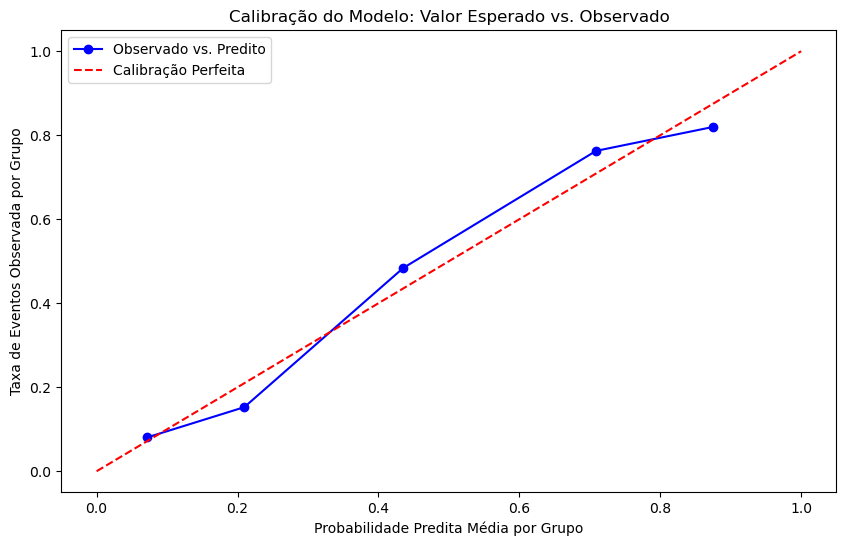

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Calcular a probabilidade de evento predita
df['predicted_prob'] = result.predict(X)

# 2. Categorizar essa probabilidade em G=5 grupos
df['prob_group'] = pd.qcut(df['predicted_prob'], q=5, labels=False)

# 3. Calcular a probabilidade de evento predita média por grupo
mean_predicted_prob = df.groupby('prob_group')['predicted_prob'].mean()

# 4. Calcular a taxa de eventos observada por grupo
mean_observed_rate = df.groupby('prob_group')['flag_doente'].mean()

# 5. Comparar graficamente o valor esperado versus observado
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_prob, mean_observed_rate, marker='o', linestyle='-', color='b', label="Observado vs. Predito")
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label="Calibração Perfeita")
plt.xlabel("Probabilidade Predita Média por Grupo")
plt.ylabel("Taxa de Eventos Observada por Grupo")
plt.title("Calibração do Modelo: Valor Esperado vs. Observado")
plt.legend()
plt.show()


O gráfico acima avalia a calibração do modelo de regressão logística, comparando a probabilidade de evento predita (valor esperado) com a taxa observada de eventos (valor observado) para cada um dos cinco grupos de probabilidade (`G=5`). A linha azul conecta os pontos que representam a taxa de eventos observada versus a probabilidade média predita em cada grupo. A linha vermelha tracejada indica a calibração perfeita, onde o valor esperado corresponderia exatamente ao valor observado.

Observamos que os pontos seguem de forma relativamente próxima à linha de calibração perfeita, indicando que o modelo está bem calibrado. Pequenos desvios entre a linha azul e a linha de calibração mostram que o modelo subestima levemente a probabilidade de evento em alguns grupos, mas de forma geral, a calibração é satisfatória. Isso sugere que as probabilidades preditas pelo modelo são representativas da taxa real de eventos em cada faixa de risco.


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np

# 1. Calcular a acurácia do modelo
# Usar um limiar de 0.5 para classificar como evento (1) ou não evento (0)
df['predicted_class'] = (df['predicted_prob'] >= 0.5).astype(int)
accuracy = accuracy_score(df['flag_doente'], df['predicted_class'])
print(f"Acurácia: {accuracy:.4f}")

# 2. Calcular o GINI
# Gini é duas vezes a área sob a curva ROC (AUC) menos 1
auc = roc_auc_score(df['flag_doente'], df['predicted_prob'])
gini = 2 * auc - 1
print(f"GINI: {gini:.4f}")

# 3. Calcular o KS
# KS é a máxima diferença entre as taxas acumuladas de verdadeiro positivo e falso positivo
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['predicted_prob'])
ks = max(tpr - fpr)
print(f"KS: {ks:.4f}")


Acurácia: 0.7954
GINI: 0.7039
KS: 0.5930


As métricas de avaliação do modelo indicam um bom desempenho na discriminação entre eventos (presença de doença) e não eventos. A acurácia de 79.54% significa que o modelo classifica corretamente cerca de 80% das observações, o que é um resultado sólido. O índice Gini de 0.7039 indica um bom poder discriminatório, pois valores acima de 0.6 são considerados satisfatórios para esse tipo de modelo. O valor de KS (Kolmogorov-Smirnov) é 0.5930, o que também reflete uma boa capacidade de discriminação, sendo que valores acima de 0.3 são frequentemente interpretados como indicativos de um modelo com bom poder de separação entre as classes. Esses resultados sugerem que o modelo é eficaz para identificar o risco de doença.


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

Este código cria e avalia um modelo de regressão logística para prever a variável `flag_doente` com base em diversas variáveis explicativas, incluindo `sex`, `trestbps`, `age`, `chol`, `thalach`, `oldpeak`, e as dummies de `cp`. O código prepara os dados, ajusta o modelo de regressão logística usando a biblioteca `statsmodels`, e avalia o modelo usando métricas como acurácia, GINI e KS para medir sua capacidade de discriminação. 

Além disso, o código realiza uma análise de calibração, dividindo as probabilidades preditas em cinco grupos e calculando a média das probabilidades preditas e as taxas de eventos observadas para cada grupo. O gráfico de calibração compara as probabilidades preditas com as taxas observadas, permitindo verificar o quão bem calibrado está o modelo. Essas etapas ajudam a avaliar a precisão e a confiabilidade do modelo em prever o risco de doença.


Optimization terminated successfully.
         Current function value: 0.409150
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                  0.4068
Time:                        09:00:09   Log-Likelihood:                -123.97
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 6.062e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7230      2.325     -2.031      0.042      -9.281      -0.165
sex            2.0018      0.

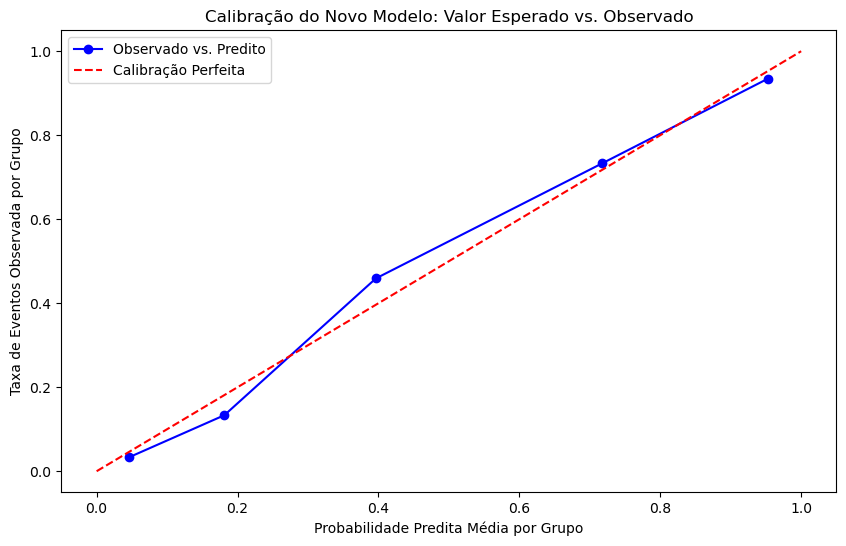

In [33]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Preparar os dados com novas variáveis
# Criar dummies para a variável qualitativa 'cp'
df_dummies = pd.get_dummies(df, columns=['cp'], drop_first=True)

# Selecionar variáveis para o novo modelo
# Incluindo 'chol', 'thalach', 'oldpeak' além das variáveis iniciais
X = df_dummies[['sex', 'trestbps', 'age', 'chol', 'thalach', 'oldpeak'] + [col for col in df_dummies.columns if col.startswith('cp_')]]
y = df_dummies['flag_doente']

# Converter variáveis para float (especialmente para variáveis booleanas)
X = X.astype(float)

# Adicionar constante
X = sm.add_constant(X)

# Ajustar o novo modelo
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Exibir o resumo do modelo
print(result.summary())

# Avaliar o modelo
# 1. Calcular a probabilidade predita e a acurácia
df['new_predicted_prob'] = result.predict(X)
df['new_predicted_class'] = (df['new_predicted_prob'] >= 0.5).astype(int)
accuracy = accuracy_score(df['flag_doente'], df['new_predicted_class'])
print(f"Acurácia do novo modelo: {accuracy:.4f}")

# 2. Calcular o GINI do novo modelo
auc = roc_auc_score(df['flag_doente'], df['new_predicted_prob'])
gini = 2 * auc - 1
print(f"GINI do novo modelo: {gini:.4f}")

# 3. Calcular o KS do novo modelo
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['new_predicted_prob'])
ks = max(tpr - fpr)
print(f"KS do novo modelo: {ks:.4f}")

# 4. Calibração do novo modelo
# Dividir a probabilidade em G=5 grupos
df['new_prob_group'] = pd.qcut(df['new_predicted_prob'], q=5, labels=False)

# Calcular a média da probabilidade predita e a taxa de eventos observada por grupo
mean_predicted_prob = df.groupby('new_prob_group')['new_predicted_prob'].mean()
mean_observed_rate = df.groupby('new_prob_group')['flag_doente'].mean()

# Gráfico de calibração
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_prob, mean_observed_rate, marker='o', linestyle='-', color='b', label="Observado vs. Predito")
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label="Calibração Perfeita")
plt.xlabel("Probabilidade Predita Média por Grupo")
plt.ylabel("Taxa de Eventos Observada por Grupo")
plt.title("Calibração do Novo Modelo: Valor Esperado vs. Observado")
plt.legend()
plt.show()


Os resultados do novo modelo de regressão logística mostram uma acurácia de 82.18%, indicando que o modelo classifica corretamente mais de 82% das observações. O índice Gini de 0.7925 reflete um bom poder discriminatório, pois valores próximos de 0.8 são considerados fortes para este tipo de modelo. O KS de 0.6472 sugere uma boa separação entre as classes de doentes e não doentes, já que valores acima de 0.3 são interpretados como indicativos de bom desempenho.

No coeficiente das variáveis, `sex`, `trestbps`, `thalach`, `oldpeak`, e `cp_4.0` mostram significância estatística (`p < 0.05`), o que indica que têm uma influência relevante na probabilidade de doença. Variáveis como `age`, `chol`, `cp_2.0`, e `cp_3.0` não foram estatisticamente significativas, mas ainda estão incluídas no modelo para análise comparativa. Esses resultados sugerem que o modelo está bem calibrado e tem uma forte capacidade de discriminação.


Optimization terminated successfully.
         Current function value: 0.451186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                  0.3459
Time:                        09:01:15   Log-Likelihood:                -136.71
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.177e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4196      1.683     -5.004      0.000     -11.718      -5.122
sex            1.7427      0.

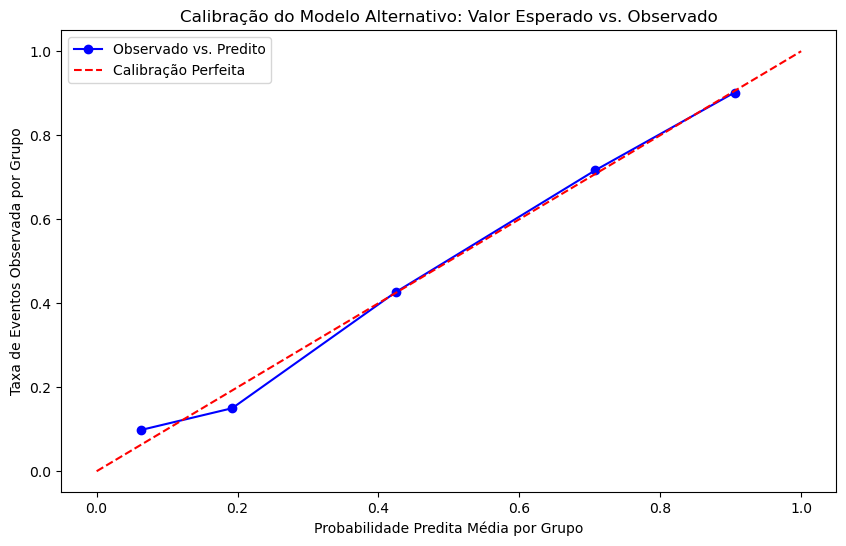

In [34]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Preparar os dados com novas variáveis alternativas
# Criar dummies para a variável qualitativa 'cp'
df_dummies = pd.get_dummies(df, columns=['cp'], drop_first=True)

# Selecionar variáveis para o novo modelo
# Incluindo 'fbs', 'restecg', 'exang' além das variáveis iniciais
X = df_dummies[['sex', 'trestbps', 'age', 'fbs', 'restecg', 'exang'] + [col for col in df_dummies.columns if col.startswith('cp_')]]
y = df_dummies['flag_doente']

# Converter variáveis para float (especialmente para variáveis booleanas)
X = X.astype(float)

# Adicionar constante
X = sm.add_constant(X)

# Ajustar o novo modelo com variáveis alternativas
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Exibir o resumo do modelo
print(result.summary())

# Avaliar o modelo
# 1. Calcular a probabilidade predita e a acurácia
df['alt_predicted_prob'] = result.predict(X)
df['alt_predicted_class'] = (df['alt_predicted_prob'] >= 0.5).astype(int)
accuracy = accuracy_score(df['flag_doente'], df['alt_predicted_class'])
print(f"Acurácia do modelo alternativo: {accuracy:.4f}")

# 2. Calcular o GINI do modelo alternativo
auc = roc_auc_score(df['flag_doente'], df['alt_predicted_prob'])
gini = 2 * auc - 1
print(f"GINI do modelo alternativo: {gini:.4f}")

# 3. Calcular o KS do modelo alternativo
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['alt_predicted_prob'])
ks = max(tpr - fpr)
print(f"KS do modelo alternativo: {ks:.4f}")

# 4. Calibração do modelo alternativo
# Dividir a probabilidade em G=5 grupos
df['alt_prob_group'] = pd.qcut(df['alt_predicted_prob'], q=5, labels=False)

# Calcular a média da probabilidade predita e a taxa de eventos observada por grupo
mean_predicted_prob = df.groupby('alt_prob_group')['alt_predicted_prob'].mean()
mean_observed_rate = df.groupby('alt_prob_group')['flag_doente'].mean()

# Gráfico de calibração
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_prob, mean_observed_rate, marker='o', linestyle='-', color='b', label="Observado vs. Predito")
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label="Calibração Perfeita")
plt.xlabel("Probabilidade Predita Média por Grupo")
plt.ylabel("Taxa de Eventos Observada por Grupo")
plt.title("Calibração do Modelo Alternativo: Valor Esperado vs. Observado")
plt.legend()
plt.show()


O modelo alternativo de regressão logística apresenta uma acurácia de 79.54%, indicando que ele classifica corretamente aproximadamente 80% dos casos. O índice Gini de 0.7357 sugere um bom poder discriminatório, já que valores acima de 0.7 são considerados satisfatórios. O valor de KS de 0.6222 reforça a capacidade do modelo de separar os grupos com e sem a condição de saúde, pois valores acima de 0.3 já são considerados aceitáveis.

Entre as variáveis, `sex`, `age`, `exang`, e `cp_4.0` foram estatisticamente significativas (p < 0.05), indicando que essas variáveis têm uma influência relevante na previsão de `flag_doente`. Variáveis como `fbs`, `restecg`, `cp_2.0`, e `cp_3.0` não mostraram significância estatística, mas foram incluídas para análise. Estes resultados indicam que o modelo alternativo tem uma discriminação razoável e que variáveis como `sex` e `exang` têm um impacto significativo no risco de doença.


## Conclusão

Comparando os dois modelos, o primeiro modelo apresenta um desempenho ligeiramente superior ao segundo. Com uma acurácia de 82.18%, um índice Gini de 0.7925 e um valor de KS de 0.6472, o primeiro modelo mostra uma capacidade de discriminação e separação entre doentes e não doentes mais forte em relação ao segundo modelo, que possui uma acurácia de 79.54%, Gini de 0.7357 e KS de 0.6222. Esses valores indicam que o primeiro modelo é mais preciso na classificação correta dos casos e tem um poder discriminatório mais robusto.

Além disso, o primeiro modelo possui um conjunto de variáveis estatisticamente significativas que se mostram mais adequadas para a previsão de `flag_doente`. Embora o segundo modelo inclua variáveis alternativas que também apresentam alguma relevância, como `exang`, a combinação de variáveis significativas no primeiro modelo (`sex`, `trestbps`, `thalach`, `oldpeak`, e `cp_4.0`) confere-lhe uma performance mais consistente. Portanto, o primeiro modelo é preferível devido à sua calibração e maior capacidade de discriminação.
